In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore")        
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
import squarify

!pip install pywaffle

     -------------------------------------- 25.2/25.2 MB 518.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#get data
df = pd.read_csv('world-happiness-report-2021.csv')
df2 = pd.read_csv('world-happiness-report.csv')
pop = pd.read_csv('population_by_country_2020.csv')

safety = df.copy()

# renaming columns for easier merge later
df.rename(columns={'Country name': 'Country'}, inplace=True)
df2.rename(columns={'Country name': 'Country'}, inplace=True)
pop.rename(columns={'Country (or dependency)': 'Country'}, inplace=True)

#might use later 
temporal = df2.groupby(['year','Country'])['Life Ladder'].mean().unstack().T
temporal = temporal.fillna(0).astype(int)

In [4]:
# colours
low_c = '#dd4124'
high_c = '#009473'
plt.rcParams["font.family"] = "monospace"

findfont: Font family ['sanserif'] not found. Falling back to DejaVu Sans.


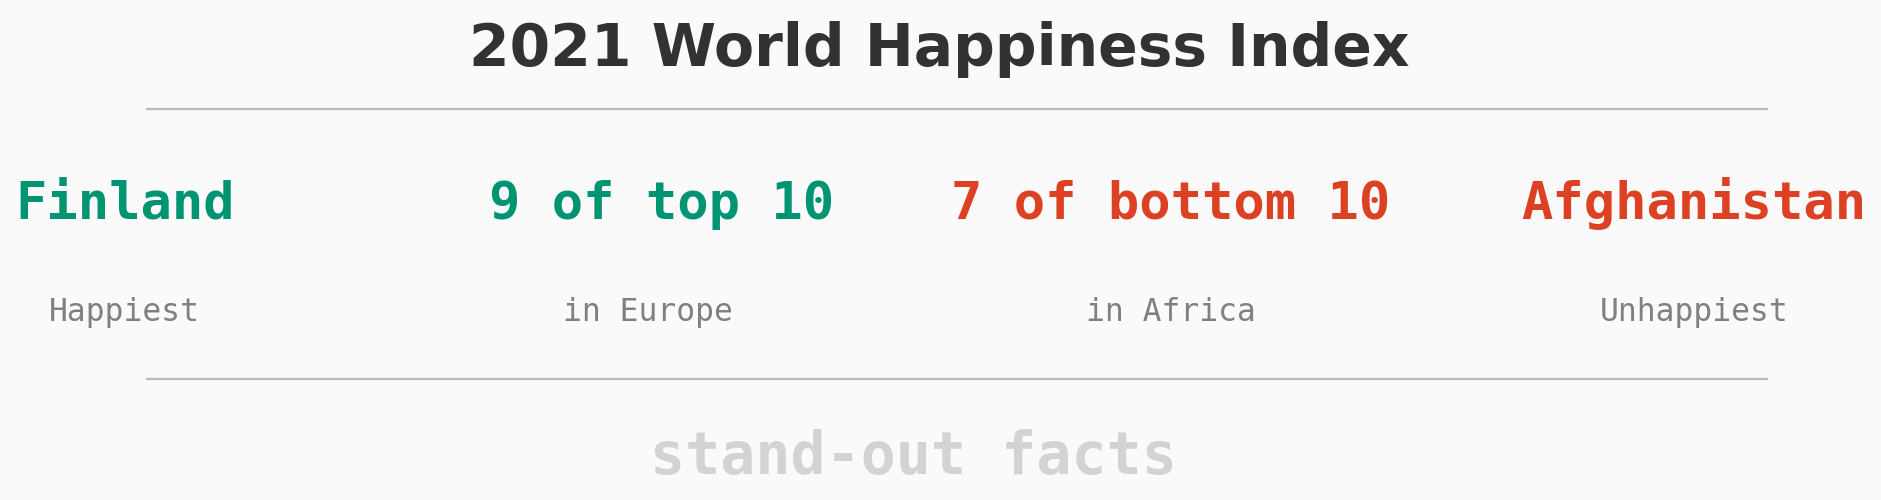

In [5]:
# inspiration ; https://www.kaggle.com/gaetanlopez/how-to-make-clean-visualizations
# changed code signif.

fig = plt.figure(figsize=(6,3),dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.2, hspace=0.4)
ax0 = fig.add_subplot(gs[0, 0])

background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(1.167,0.85,"2021 World Happiness Index",color='#323232',fontsize=28, fontweight='bold', fontfamily='sanserif',ha='center')
ax0.text(1.13,-0.35,"stand-out facts",color='lightgray',fontsize=28, fontweight='bold', fontfamily='monospace',ha='center')

ax0.text(0,0.4,"Finland",color=high_c,fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0,0.1,"Happiest",color='gray',fontsize=15, fontfamily='monospace',ha='center')

ax0.text(0.77,0.4,"9 of top 10",color=high_c,fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(0.75,0.1,"in Europe",color='gray',fontsize=15, fontfamily='monospace',ha='center')

ax0.text(1.5,0.4,"7 of bottom 10",color=low_c,fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(1.5,0.1,"in Africa",color='gray',fontsize=15, fontfamily='monospace',ha='center')

ax0.text(2.25,0.4,"Afghanistan",color=low_c,fontsize=25, fontweight='bold', fontfamily='monospace',ha='center')
ax0.text(2.25,0.1,"Unhappiest",color='gray',fontsize=15, fontfamily='monospace',ha='center')

ax0.set_yticklabels('')
ax0.set_xticklabels('')
ax0.tick_params(axis='both',length=0)

for s in ['top','right','left','bottom']:
    ax0.spines[s].set_visible(False)
    
import matplotlib.lines as lines
l1 = lines.Line2D([0.15, 1.95], [0.67, 0.67], transform=fig.transFigure, figure=fig,color = 'gray', linestyle='-',linewidth = 1.1, alpha = .5)
fig.lines.extend([l1])
l2 = lines.Line2D([0.15, 1.95], [0.07, 0.07], transform=fig.transFigure, figure=fig,color = 'gray', linestyle='-',linewidth = 1.1, alpha = .5)
fig.lines.extend([l2])
    
plt.show()